<img alt='UCL' src="images/ucl_logo.png" align='center'>


[<img src="images/noun_post_2109127.svg" width="50" align='right'>](016_Python_for.ipynb)
[<img src="images/noun_pre_2109128.svg" width="50" align='right'>](018_Python_xxx.ipynb)



# 018 Files and other Resources


## Introduction



### Purpose

In this session, we will learn about files and similar resources. We will introduce the standard Python library [`pathlib`](https://docs.python.org/3/library/pathlib.html) which is how we deal with file paths, as well as the local package [gurlpath](geog0111/gurlpath) derived from [`urlpath`](https://github.com/chrono-meter/urlpath) that allows a similar object-oriented approach with files and other objects on the web. We will also cover opening and closing files, and some simple read- and write-operations.



### Prerequisites

You will need some understanding of the following:


* [001 Using Notebooks](001_Notebook_use.ipynb)
* [002 Unix](002_Unix.ipynb)
* [003 Getting help](003_Help.ipynb)
* [010 Variables, comments and print()](010_Python_Introduction.ipynb)
* [011 Data types](011_Python_data_types.ipynb) 
* [012 String formatting](012_Python_strings.ipynb)
* [013_Python_string_methods](013_Python_string_methods.ipynb)



### Timing

The session should take around 40 minutes.

## Resource location

We store information on a computer in files, or file-like resources. We will use the term 'file' below to mean either of these concepts, other than specific issues relating to particular types of file/resource.

To get information from files, we need to be able to specify some **address** for the file/resource location, along with some way of interacting with the file. These concepts are captured in the idea of a [URI](https://en.wikipedia.org/wiki/Uniform_Resource_Identifier) (Uniform Resource Indicator). You will most likely have come across the related idea of a [Uniform Resource Locator (URL)](https://en.wikipedia.org/wiki/URL), which is a URL such as [https://www.geog.ucl.ac.uk/people/academic-staff/philip-lewis](https://www.geog.ucl.ac.uk/people/academic-staff/philip-lewis)
that gives:

* the location of the resource: `people/academic-staff/philip-lewis`
* the access and interpretation protocol: [`https`](https://en.wikipedia.org/wiki/HTTPS) (secure [`http`](https://en.wikipedia.org/wiki/Hypertext_Transfer_Protocol))
* the network domain name: [`www.geog.ucl.ac.uk`](https://www.geog.ucl.ac.uk)

When we visit this URL using an appropriate tool such as a browser, the tool can access and interpret the information in the resource: in this case, interpret the [html code](https://www.w3schools.com/html) in the file pointed to by the URL.

Similarly, we will be used to the idea of accessing `files` on the computer. These may be in the local file system, or on some network or cloud storage that might be accessible from the local file system. An example of such a file would be some Python code file such as 
[`geog0111/helloWorld.py`](http://localhost:8888/edit/notebooks/geog0111/helloWorld.py).

The two most convenient Python libraries to use for accessing files are [`pathlib`](https://docs.python.org/3/library/pathlib.html) for file paths, the extension package [`urlpath`](https://github.com/chrono-meter/urlpath) for URLs.

## `Path`

`Path` is part of the `pathlib` package, so in any Python codes, we first must import this into our workspace:

In [1]:
from pathlib import Path

We may repeat this `import` in the codes below, for illustration purposes. You need only import it once in any file or session though. 

### `posix`

The main class we will use from `pathlib` is `Path`. This provides an object-oriented way of dealing with files and paths, that is portable to any operating system. Recall from [002 Unix](002_Unix.ipynb) that unix-like operating systems use `posix` filenames, separated by forward slash `/` (or just *slash*). Windows uses a backslash `\`. But *we* want to write Python codes that are generic and shouldn't need to greatly worry about such issues. Using `Path` greatly helps in this regard, though there will always the occasional time we do need to distinguish `posix` and non-`posix` systems.



### Common `Path` methods

We can start with a table of [commonly-used methods](https://stackabuse.com/introduction-to-the-python-pathlib-module/#:~:text=The%20Pathlib%20module%20can%20deal,(usually%20the%20current%20directory).) using `Path` and give their [Unix equivalents](002_Unix.ipynb), most of which we have already learned.

|command| unix-equivalent | purpose|
|---|---|---|
|`Path.cwd()`| `pwd` |Return path object representing the current working directory|
|`Path.home()`| `~`| Return path object representing the home directory|
|`Path.stat()`| `ls -l`* | return info about the path|
|`Path.chmod()`| `chmod` | change file mode and permissions|
|`Path.glob(pattern)`| `ls *` | Glob the pattern given in the directory that is represented by the path, yielding matching files of any kind|
|`Path.mkdir()`| `mkdir` | to create a new directory at the given path|
|`Path.rename()`| `mv` | Rename a file or directory to the given target|
|`Path.rmdir()`| `rmdir` | Remove the empty directory|
|`Path.unlink()`| `rm` | Remove the file or symbolic link|

`*` Really, `Path.stat()` equates to the `unix` command `stat`, but this contains the information we access using `ls -l`.

Since we are already familiar with most of these commands in `unix`, we can get straight into using them:

In [2]:
from pathlib import Path

print(f'I am in directory {Path.cwd()}')
print(f'My home is {Path.home()}')

I am in directory /Users/plewis/Documents/GitHub/geog0111/notebooks
My home is /Users/plewis


To keep the filenames generic, we form a filename using `Path()`, so `Path('bin','README')` would refer to the filename `bin/README` on a `posix` system, and `bin/README` on Windows.

### File information

The file permissions format we are used to from `ls -l` is accessed through `filename.stat().st_mode` but needs to be converted to octal to match to `ls`

    oct(filename.stat().st_mode)

In [3]:
# similar information to ls -l
readme=Path('bin','README')
print(f'README file is {readme}')
print(f'       size is {readme.stat().st_size} bytes')
print(f'       mode is {oct(readme.stat().st_mode)}')
print(f'      owner is {readme.owner()}')

README file is bin/README
       size is 16 bytes
       mode is 0o100644
      owner is plewis


### glob

To use a wildcard (or any pattern) to refer to a list of files, we use `Path.glob()` (or `Path.rglob()` for a recursive list):

In [4]:
# use glob to get a list of filenames in the directory bin 
# that end with .sh -> pattern *.sh using a wildcard
filenames = Path('bin').glob('*.sh')
# loop over the filenames
for f in filenames:
    print(f'{f} : {oct(readme.stat().st_mode)}')

bin/notebook-mkdocs.sh : 0o100644
bin/setup.sh : 0o100644
bin/notebook-run.sh : 0o100644
bin/link-set.sh : 0o100644
bin/git-remove-all.sh : 0o100644


#### Exercise 1

* Use `Path` to show the file permissions of all files that end `.sh` in the directory `bin`

In [ ]:
# ANSWER
# Use Path to show the file permissions of
# all files that end .sh in the directory bin

# use glob to get a list of filenames in the directory bin 
# that end with .sh -> pattern *.sh using a wildcard
filenames = Path('bin').glob('*.sh')
# loop over the filenames
for f in filenames:
    print(f)

### `absolute` `parts` `name` `parent`

We can use `Path` to convert filenames between relative and absolute representations using `absolute()` and `relative_to()`:

In [ ]:
print(f'I am in {Path.cwd()}')

# define a relative path name
readme=Path('bin','README')
print(f'original relative name:\n\t{readme}')

# convert to absolute
readme = readme.absolute()
print(f'absolute name:\n\t{readme}')

# now make a relative pathname, 
# reletive to current working directory
readme = readme.relative_to(Path.cwd())
print(f'name relative to {Path.cwd()}:\n\t{readme}')

Quite often we need to split some filename up into its constituent parts. This is achieved with `paths` which gives a list of the file name tree:

In [ ]:
readme=Path('bin','README')
print(readme.parts)

We could use that to get at the filename `README` from the last item in the list, but a more object-oriented way is to use `name` (and `parent` to get the directory up to that point):

In [ ]:
readme=Path('bin','README')
print(f'name   of {readme} is {readme.name}')
print(f'parent of {readme} is {readme.parent}')

#### Exercise 2

* print out the absolute pathname of the directory that `images/ucl.png` is in
* print the size of the file in KB to two decimal places

You will need to know how many Bytes in a Kilobyte, and how to [format a string to two decimal places](012_Python_strings.ipynb#String-formating).

## Reading and writing

We can conveniently use `pathlib` to deal with file input and output. The main methods to be aware of are:


|command|  purpose|
|---|---|
|`Path.open()`| open a file and return a file descriptor|
|`Path.read_text()`|  read text|
|`Path.write_text()`| write text|
|`Path.read_bytes()`| read byte data|
|`Path.write_bytes()`| write byte data|


### `with ... as ...` `Path.open` `yaml` `json`

The first of these provides a file descriptor for the open file. This is used to interface to other input/output functions in Python. A typical example of this is reading a configuration file in [`yaml` format](http://zetcode.com/python/yaml/).

The usual way of opening a file to get the file descriptor is:

    with Path(filename).open('r') as f:
       # do some reading with f
       pass
       

We use the form `with ... as ...` here, so that the file descriptor `f` only exists within this construct and the file is automatically closed when we finish. Codes are spaced in inside the construct, as we have seen in `if ...` or `for ... in ...` constructs.

Here, we have set the flag `r` within the `open()` statement (this is the default mode). This means that the file will be opened for *reading* only. Alternatives include `w` for writing, or `w+` for appending.

In the following example, we use `Path` to open the file [`bin/copy/environment.yml`](bin/copy/environment.yml) and read it using the `yaml` library. This file specifies which packages are loaded in our Python environment. It has a simple ascii format, but since it is a `yaml` file, we should read it with code that interprets the format correctly and safely into a dictionary. This is done using `yaml.safe_load(f)` with `f` an open file descriptor.

In [ ]:
import yaml

# form the file name
yaml_file = Path('bin','copy','environment.yml')

with yaml_file.open('r') as f:
    env = yaml.safe_load(f)

print(f'env is type {type(env)}')
print(f'env keys: {env.keys()}')

Another common file format for configuration information is [`json`](https://www.json.org/json-en.html). We can use the same form of code as above to write the information in `env` into a `json` format file:

In [ ]:
import json

# form the file name
json_file = Path('bin','copy','environment.json')

with json_file.open('w') as f:
    json.dump(env, f)

This now exists as [`bin/copy/environment.json`](bin/copy/environment.json).

## read and write text

To use `Path.write_text()` to write text to a file `work/easy.txt`, we simply do:

In [ ]:
# from https://www.json.org
some_text = '''
It is easy for humans to read and write.
It is easy for machines to parse and generate. 
'''

# set up the filename
outfile = Path('work','easy.txt')
# write the text
nbytes = outfile.write_text(some_text)
# print what we did
print(f'wrote {nbytes} bytes to {outfile}')

#### Exercise 3

* Using `Path.read_text()` read the text from the file `work/easy.txt` and print the text returned.
* split the text into lines of text using `str.split()` at each newline, and print out the resulting list

You learned how to split strings in [013_Python_string_methods](013_Python_string_methods.ipynb#split()-and-join())

In [ ]:
# ANSWER
# Using Path.read_text() read the text from the file work/easy.txt 
# and print the text returned.

# set up the filename
infile = Path('work','easy.txt')
# read the text
read_text = infile.read_text()

# split the text into lines of 
# text using str.split() at each newline, 
# and print out the resulting list
lines = read_text.split('\n')
print(lines)

A similar approach is taken for reading and writing binary data.

## Reading from a URL

The library `gurlpath` is designed to operate in a similar manner to `pathlib` for reading data from URLs. 


|command|  purpose|
|---|---|
|`URL.read_text()`|  read text|
|`URL.read_bytes()`| read byte data|

The object corresponding to `Path` is `URL`:

In [16]:
from geog0111.gurlpath import URL
url = "https://www.metoffice.gov.uk/hadobs/hadukp/data/monthly/HadSEEP_monthly_qc.txt"

f = URL(url)

We have similar functionality for manipulating filenames, but more limited file information:

In [17]:
print(f'URL {f}')
print(f'name   : {f.name}')
print(f'parent : {f.parent}')

URL https://www.metoffice.gov.uk/hadobs/hadukp/data/monthly/HadSEEP_monthly_qc.txt
name   : HadSEEP_monthly_qc.txt
parent : https://www.metoffice.gov.uk/hadobs/hadukp/data/monthly


It is particularly useful for a simple object-oriented approach to reading text (or e.g. `json`) information from a URL:

In [18]:
html_data = f.read_text()

If we examine the data on the website [HadSEEP_monthly_qc.txt](https://www.metoffice.gov.uk/hadobs/hadukp/data/monthly/HadSEEP_monthly_qc.txt), we see that the first 3 lines are metedata. The fourth line specifies the data columns, then the rest are datra values, with `-99.9` as invalid.



In [15]:
import pandas as pd
import io
c=pd.read_table(io.StringIO(f.read_text()),skiprows=3,na_values=[-99.9],sep=r"[ ]{1,}",engine='python')
c.head()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANN
0,1873,87.1,50.4,52.9,19.9,41.1,63.6,53.2,56.4,62.0,86.0,59.4,15.7,647.7
1,1874,46.8,44.9,15.8,48.4,24.1,49.9,28.3,43.6,79.4,96.1,63.9,52.3,593.5
2,1875,96.9,39.7,22.9,37.0,39.1,76.1,125.1,40.8,54.7,137.7,106.4,27.1,803.5
3,1876,31.8,71.9,79.5,63.6,16.5,37.2,22.3,66.3,118.2,34.1,89.0,162.9,793.3
4,1877,146.0,47.7,56.2,66.4,62.3,24.9,78.5,82.4,38.4,58.1,144.5,54.2,859.6


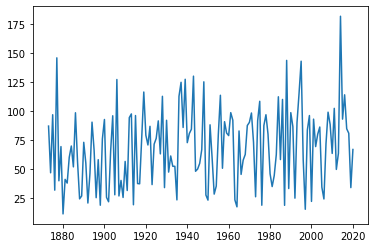

In [150]:
import matplotlib.pyplot as plt
plt.plot(c['YEAR'],c['JAN'])

In [118]:
# ANSWER 
# following from above

# set up the filename
infile = Path('work','easy.txt')
# read the text
read_text = infile.read_text()

# print what we did
print(f'read\n"""{read_text}"""\nfrom {infile}')

NameError: name 'Path' is not defined

In [119]:
# ANSWER
import json

# show the size of the files 
# bin/copy/environment.json and bin/copy/environment.yml

# form the file names
json_file = Path('bin','copy','environment.json')
yaml_file = Path('bin','copy','environment.yml')
# loop and print size
for f in [json_file,yaml_file]:
    print(f'{f} : {f.stat().st_size} bytes')

NameError: name 'Path' is not defined

In [ ]:
# ANSWER

# read the information from bin/copy/environment.json using Path and json.load() into a variable called 
# jenv and print the keys of the dictionary jenv

# open file for read
with json_file.open('r') as f:
    jenv = json.load(f)
    
print(f'jenv keys: {jenv.keys()}')

# use assert to check if the keys are the same
assert jenv.keys() == env.keys()
print('passed assertion')

In [ ]:
# ANSWER 

# print out the absolute pathname of the 
# directory that images/ucl.png is in
abs_name = Path('images/ucl.png').absolute()
print(abs_name)

# we want the parent!
print(f'the file {abs_name.name} is in {abs_name.parent}')

# print the size of the file in bytes
print(f'{abs_name.name} has size {abs_name.stat().st_size} bytes')

# 1 KB is 1024 Bytes
# .2f is 2 d.p. format
print(f'{abs_name.name} has size ' +\
      f'{abs_name.stat().st_size/1024:.2f} KB')

We will use this idea to make a dictionary of our ENSO dataset, using the items in the header for the keys. In this way, we obtain a  more elegant representation of the dataset, and can refer to items by names (keys) instead of column numbers.

In [ ]:
import requests
import numpy as np
import io

# copy the useful data
start_head = txt.find('YEAR')
start_data = txt.find('1950\t')
stop_data  = txt.find('2018\t')

header = txt[start_head:start_data].split()
data = np.loadtxt(io.StringIO(txt[start_data:stop_data]),unpack=True)

# use zip to load into a dictionary
data_dict = dict(zip(header, data))

key = 'MAYJUN'
# plot data
plt.figure(0,figsize=(12,7))
plt.title('ENSO data from {0}'.format(url))
plt.plot(data_dict['YEAR'],data_dict[key],label=key)
plt.xlabel('year')
plt.ylabel('ENSO')
plt.legend(loc='best')

#### Exercise 1

* copy the code above, and modify so that datasets for months `['MAYJUN','JUNJUL','JULAUG']` are plotted on the graph

Hint: use a for loop

In [ ]:
# do exercise here
# ANSWER

import requests
import numpy as np
import io

# access dataset as above
url = "http://www.esrl.noaa.gov/psd/enso/mei.old/table.html"
txt = requests.get(url).text

# copy the useful data
start_head = txt.find('YEAR')
start_data = txt.find('1950\t')
stop_data  = txt.find('2018\t')

header = txt[start_head:start_data].split()
data = np.loadtxt(io.StringIO(txt[start_data:stop_data]),unpack=True)

# use zip to load into a dictionary
data_dict = dict(zip(header, data))


'''
Do the loop here
'''
for i,key in enumerate(['MAYJUN','JUNJUL','JULAUG']):
    # plot data
    '''
    Use enumeration i as figure number
    '''
    plt.figure(i,figsize=(12,7))
    plt.title('ENSO data from {0}'.format(url))
    plt.plot(data_dict['YEAR'],data_dict[key],label=key)
    plt.xlabel('year')
    plt.ylabel('ENSO')
    plt.legend(loc='best')

We can also usefully use a dictionary with a printing format statement. In that case, we refer directly to the key in ther format string. This can make printing statements much easier to read. We don;'t directly pass the dictionary to the `fortmat` staterment, but rather `**dict`, where `**dict` means "treat the key-value pairs in the dictionary as additional named arguments to this function call".

So, in the example:

In [ ]:
import requests
import numpy as np
import io

# access dataset as above
url = "http://www.esrl.noaa.gov/psd/enso/mei/table.html"
txt = requests.get(url).text

# copy the useful data
start_head = txt.find('YEAR')
start_data = txt.find('1950\t')
stop_data  = txt.find('2018\t')

header = txt[start_head:start_data].split()
data = np.loadtxt(io.StringIO(txt[start_data:stop_data]),unpack=True)

# use zip to load into a dictionary
data_dict = dict(zip(header, data))
print(data_dict.keys())

# print the data for MAYJUN
print('data for MAYJUN: {MAYJUN}'.format(**data_dict))

The line `print('data for MAYJUN: {MAYJUN}'.format(**data_dict))` is equivalent to writing:

    print('data for {MAYJUN}'.format(YEAR=data_dict[YEAR],DECJAN=data_dict[DECJAN], ...))
    
In this way, we use the keys in the dictionary as keywords to pass to a method.

Another useful example of such a use of a dictionary is in saving a numpy dataset to file.

If the data are numpy arrays in a dictionary as above, we can store the dataset using:



In [ ]:
import requests
import numpy as np
import io

# access dataset as above
url = "http://www.esrl.noaa.gov/psd/enso/mei/table.html"
txt = requests.get(url).text

# copy the useful data
start_head = txt.find('YEAR')
start_data = txt.find('1950\t')
stop_data  = txt.find('2018\t')

header = txt[start_head:start_data].split()
data = np.loadtxt(io.StringIO(txt[start_data:stop_data]),unpack=True)

# use zip to load into a dictionary
data_dict = dict(zip(header, data))

filename = 'enso_mei.npz'

# save the dataset
np.savez_compressed(filename,**data_dict)

What we load from the file is a dictionary-like object `<class 'numpy.lib.npyio.NpzFile'>`.

If needed, we can cast this to a dictionary with `dict()`, but it is generally more efficient to keep the original type.

In [ ]:
# load the dataset

filename = 'enso_mei.npz'

loaded_data = np.load(filename)

print(type(loaded_data))

# test they are the same using np.array_equal
for k in loaded_data.keys():
    print('\t',k,np.array_equal(data_dict[k], loaded_data[k]))

#### Exercise 2

* Using what you have learned above, access the Met Office data file [`https://www.metoffice.gov.uk/hadobs/hadukp/data/monthly/HadSEEP_monthly_qc.txt`](https://www.metoffice.gov.uk/hadobs/hadukp/data/monthly/HadSEEP_monthly_qc.txt) and create a 'data package' in a numpy`.npz` file that has keys of `YEAR` and each month in the year, with associated datasets of Monthly Southeast England precipitation (mm).
* confirm that tha data in your `npz` file is the same as in your original dictionary
* produce a plot of October rainfall using these data for the years 1900 onwards

In [ ]:
# do exercise here
# ANSWER

'''
Exploration of dataset shows:


Monthly Southeast England precipitation (mm). Daily automated values used after 1996.
Wigley & Jones (J.Climatol.,1987), Gregory et al. (Int.J.Clim.,1991)
Jones & Conway (Int.J.Climatol.,1997), Alexander & Jones (ASL,2001). Values may change after QC.
YEAR   JAN   FEB   MAR   APR   MAY   JUN   JUL   AUG   SEP   OCT   NOV   DEC   ANN
 1873  87.1  50.4  52.9  19.9  41.1  63.6  53.2  56.4  62.0  86.0  59.4  15.7  647.7
 1874  46.8  44.9  15.8  48.4  24.1  49.9  28.3  43.6  79.4  96.1  63.9  52.3  593.5

so we have 3 lines of header
then the column titles
then the data

we can define these as before using

txt.find('YEAR')
start_data = txt.find('1873')
stop_data = None


Other than the filenames then, the code
is identical
'''

import requests
import numpy as np
import io

# access dataset as above
url = "https://www.metoffice.gov.uk/hadobs/hadukp/data/monthly/HadSEEP_monthly_qc.txt"
txt = requests.get(url).text

# copy the useful data
start_head = txt.find('YEAR')
start_data = txt.find('1873')
stop_data  = None

header = txt[start_head:start_data].split()
data = np.loadtxt(io.StringIO(txt[start_data:stop_data]),unpack=True)

# use zip to load into a dictionary
data_dict = dict(zip(header, data))

filename = 'HadSEEP_monthly_qc.npz'

# save the dataset
np.savez_compressed(filename,**data_dict)

In [ ]:
# ANSWER

loaded_data = np.load(filename)

print(type(loaded_data))

# test they are the same using np.array_equal
for k in loaded_data.keys():
    print('\t',k,np.array_equal(data_dict[k], loaded_data[k]))

In [ ]:
# ANSWER

'''
October rainfall, 1900+
'''

year = loaded_data['YEAR']

# mask where years match
mask = year  >= 1900

oct = loaded_data['OCT']

# set invalid data points to nan
oct[oct<0] = np.nan

plt.plot(year[mask],oct[mask])

### 1.3.5 Summary

In this section, we have extended the types of data we might come across to include groups . We dealt with ordered groups of various types (`tuple`, `list`), and introduced the numpy package for numpy arrays (`np.array`). We saw dictionaries as collections with which we refer to individual items with a key.

We learned in the previous section how to pull apart a dataset presented as a string using loops and various using methods and to construct a useful dataset 'by hand' in a list or similar structure. It is useful, when learning to program, to know how to do this.

Here, we saw that packages such as numpy provide higher level routines that make reading data easier, and we would generally use these in practice. We saw how we can use `zip()` to help load a dataset from arrays into a dictionary, and also the value of using a dictionary representation when saving numpy files.